In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct file path and encoding
data = pd.read_csv('data/sales_data_sample.csv', encoding='latin1')

# Display the first 5 rows to verify
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Basic info
print("\nData Info:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Distribution of 'STATUS' column
print("\nOrder Status Distribution:\n", data['STATUS'].value_counts())

# Distribution of 'COUNTRY' column
print("\nCountry Distribution:\n", data['COUNTRY'].value_counts())

# Distribution of 'DEALSIZE' column
print("\nDeal Size Distribution:\n", data['DEALSIZE'].value_counts())


Missing Values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null  

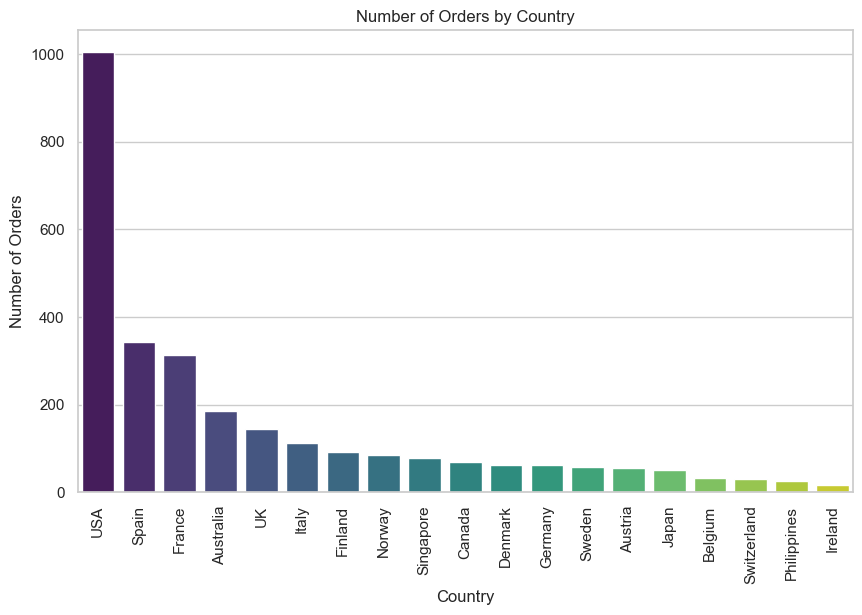

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=country_order,
    x='Country',
    y='Orders',
    hue='Country',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Number of Orders by Country')
plt.ylabel('Number of Orders')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()


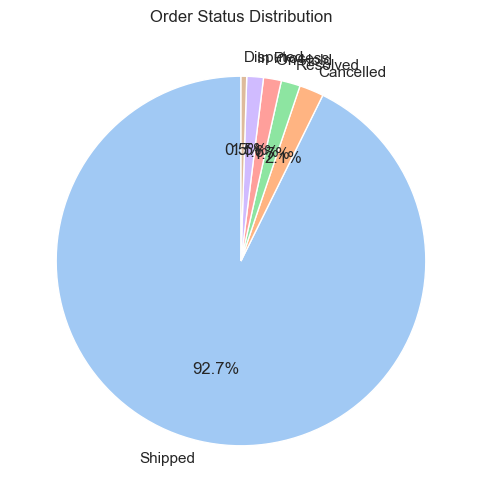

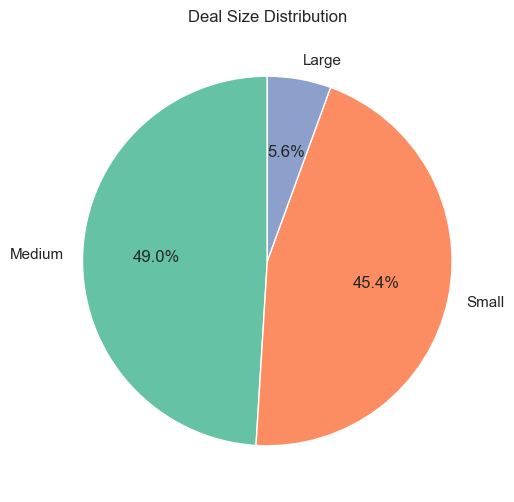

In [11]:
# 2. Order Status Distribution
plt.figure(figsize=(6,6))
data['STATUS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.ylabel('')
plt.show()


# 3. Deal Size Distribution
plt.figure(figsize=(6,6))
data['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Deal Size Distribution')
plt.ylabel('')
plt.show()

In [12]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


In [13]:
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month
data['Quarter'] = data['ORDERDATE'].dt.quarter


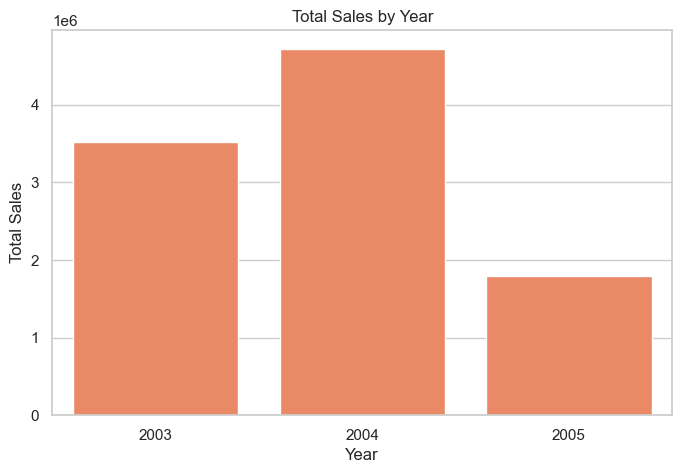

In [14]:
plt.figure(figsize=(8,5))
yearly_sales = data.groupby('Year')['SALES'].sum().reset_index()

sns.barplot(data=yearly_sales, x='Year', y='SALES', color='coral')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.show()


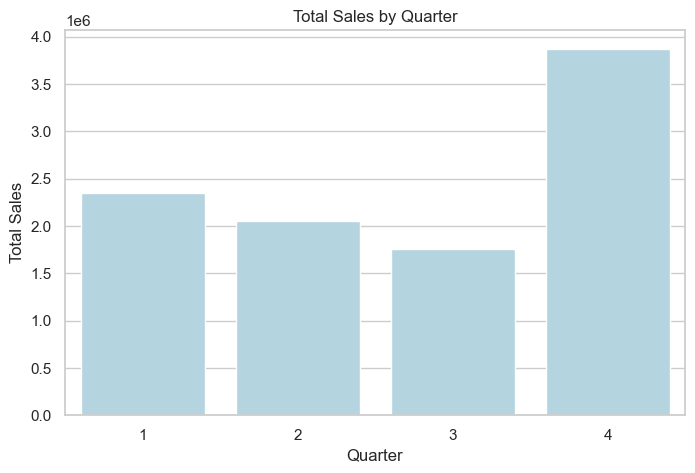

In [15]:
plt.figure(figsize=(8,5))
quarterly_sales = data.groupby('Quarter')['SALES'].sum().reset_index()

sns.barplot(data=quarterly_sales, x='Quarter', y='SALES', color='lightblue')
plt.title('Total Sales by Quarter')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.show()


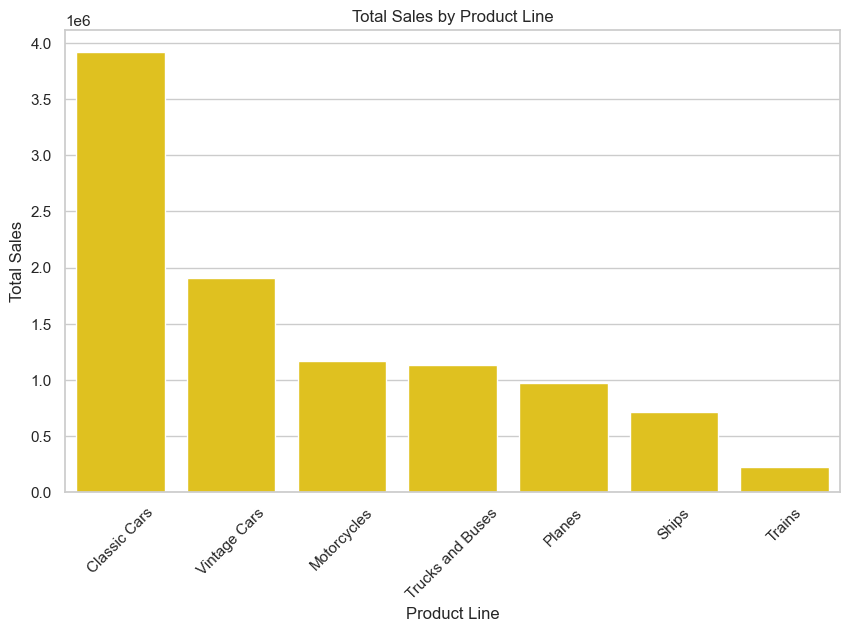

In [16]:
plt.figure(figsize=(10,6))
top_products = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False)

sns.barplot(data=top_products, x='PRODUCTLINE', y='SALES', color='gold')
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.show()


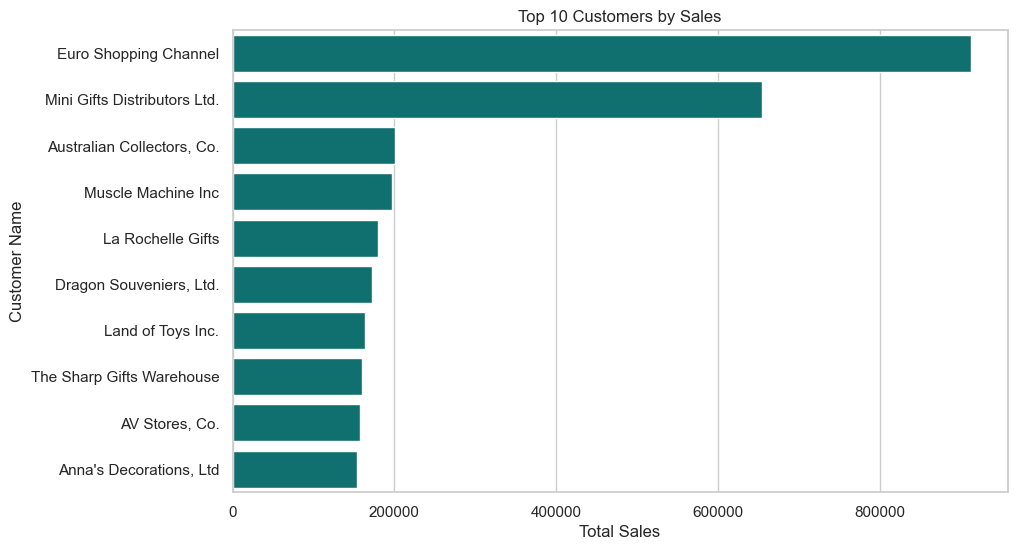

In [20]:
plt.figure(figsize=(10,6))
top_customers = data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False).head(10)

sns.barplot(data=top_customers, x='SALES', y='CUSTOMERNAME', color='teal')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()


/var/folders/0t/z76sj8f53wg2szvy6np8vt040000gn/T/ipykernel_4979/3476659973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deal_sales, x='DEALSIZE', y='SALES', palette='Set2')


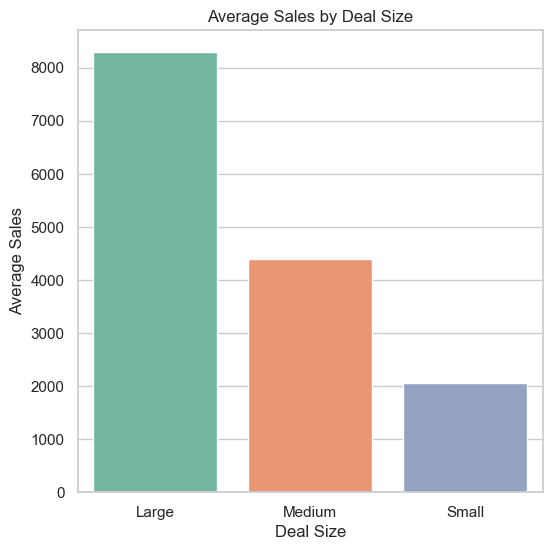

In [18]:
plt.figure(figsize=(6,6))
deal_sales = data.groupby('DEALSIZE')['SALES'].mean().reset_index().sort_values(by='SALES', ascending=False)

sns.barplot(data=deal_sales, x='DEALSIZE', y='SALES', palette='Set2')
plt.title('Average Sales by Deal Size')
plt.ylabel('Average Sales')
plt.xlabel('Deal Size')
plt.show()
